## Project Overview
In this project I will be using Major League Baseball's(MLB) Statcast data to analyze the differences between Giancarlo Stanton and Aaron Judge's style of play. These two players are some of the best hitters in the MLB but I'd like to learn more about the differences in their prospective play styles.  Statcast is a statistics technology that was introduced to the MLB in 2015. The software collects mountains of data on each game played and feeds it into a massive database owned by the MLB. It's described on Wikipedia as "a high-speed, high-accuracy, automated tool developed to analyze player movements and athletic abilities in Major League Baseball." Statcast measures simple stats like 'pitch release speed' and 'type of pitch' but also includes more complex information such as 'ball spin rate', 'release extension' and 'bat contact percentage'.  A list of all the information included in the original data has been printed by the first code chunk below.


In [2]:
#Import necessary packages and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

#Read in Player Data
judge = pd.read_csv('judge.csv')
stanton = pd.read_csv('stanton.csv')

#Make sure python prints all columns of the dataframe
pd.set_option('display.max_columns', None)

#Snapshot of the data in question
print(stanton.info())
print(judge.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       5840 non-null   object 
 1   game_date                        5898 non-null   object 
 2   release_speed                    5844 non-null   float64
 3   release_pos_x                    5804 non-null   float64
 4   release_pos_z                    5804 non-null   float64
 5   player_name                      5898 non-null   object 
 6   batter                           5898 non-null   int64  
 7   pitcher                          5898 non-null   int64  
 8   events                           1482 non-null   object 
 9   description                      5898 non-null   object 
 10  spin_dir                         0 non-null      float64
 11  spin_rate_deprecated             0 non-null      float64
 12  break_angle_deprecat

# Successful At-Bat Overview 
The first thing we want to see is a breakdown of each player's offensive output.  First, well filter the data by year so we can see how players games changed between seasons, then well look into all the at-bats resulting in positive outcomes and find out what proportion of the total successful at bats were singles, doubles, triples, homeruns, and walks.  


Text(0.5, 1.0, 'Judge Successful At-Bats 2017')

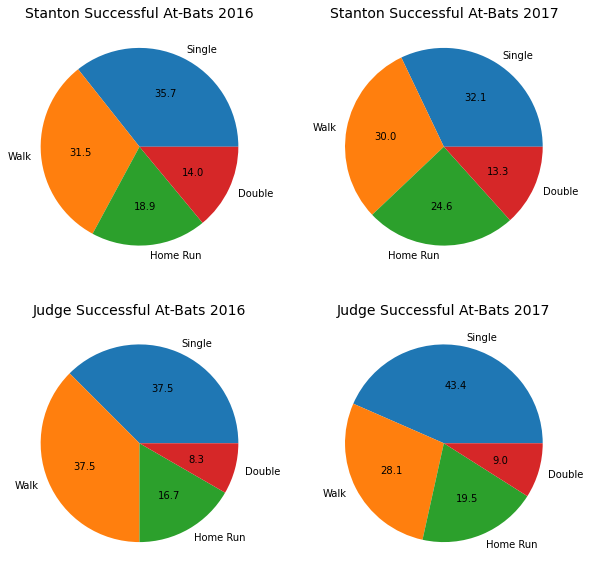

In [3]:
#create pie charts of the positive events (walk, single,double, triple, hr) in 2016 and 2017
suc_events=['walk','single', 'double', 'home_run']
#filter data into variables containing only one year's stats for each player
#Stanton Data
stanton_events_2016 = stanton[(stanton['game_date']>'2015-12-31')&(stanton['game_date']<'2017-01-01')]
stanton_events_2017 = stanton[(stanton['game_date']>'2016-12-31')&(stanton['game_date']<'2018-01-01')]

stanton_suc_events_2016= stanton_events_2016[stanton_events_2016['events'].isin(suc_events)]
stanton_suc_events_2016= stanton_suc_events_2016.value_counts('events').reset_index(name='counts')
stanton_suc_events_2017= stanton_events_2017[stanton_events_2017['events'].isin(suc_events)]
stanton_suc_events_2017= stanton_suc_events_2017.value_counts('events').reset_index(name='counts')
#Judge_Data
judge_events_2016= judge[(judge['game_date']>'2015-12-31')&(judge['game_date']<'2017-01-01')]
judge_events_2017= judge[(judge['game_date']>'2016-12-31')&(judge['game_date']<'2018-01-01')]
judge_suc_events_2016= judge_events_2016[judge_events_2016['events'].isin(suc_events)]
judge_suc_events_2016= judge_suc_events_2016.value_counts('events').reset_index(name='counts')
judge_suc_events_2017= judge_events_2017[judge_events_2017['events'].isin(suc_events)]
judge_suc_events_2017= judge_suc_events_2017.value_counts('events').reset_index(name='counts')

#graph the events 
fig,axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].pie(stanton_suc_events_2016['counts'], labels=['Single','Walk', 'Home Run', 'Double'], autopct='%.1f')
axs[0,0].set_title('Stanton Successful At-Bats 2016', size=14)
axs[0,1].pie(stanton_suc_events_2017['counts'], labels=['Single','Walk', 'Home Run', 'Double'], autopct='%.1f')
axs[0,1].set_title('Stanton Successful At-Bats 2017', size=14)
axs[1,0].pie(judge_suc_events_2016['counts'],labels=['Single','Walk', 'Home Run', 'Double'], autopct='%.1f')
axs[1,0].set_title('Judge Successful At-Bats 2016', size=14)
axs[1,1].pie(judge_suc_events_2017['counts'], labels=['Single','Walk', 'Home Run', 'Double'], autopct='%.1f')
axs[1,1].set_title('Judge Successful At-Bats 2017', size=14)


## Launch Speed and Launch Angle Analysis
Next, we are going to further investigate the difference between Judge and Stanton’s home runs.  We are curious to find out which player hits the ball harder and which hits the ball at a greater launch angle.  These are the same stats that many pitchers use to determine what types of pitches they should throw to each player to minimize the chance of home runs. 

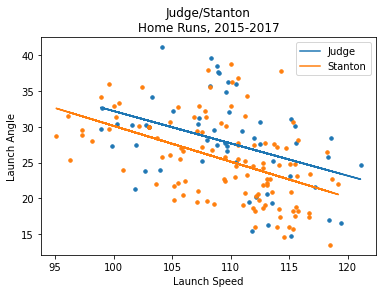

Text(0.5, 1.0, 'Stanton Home Run ')

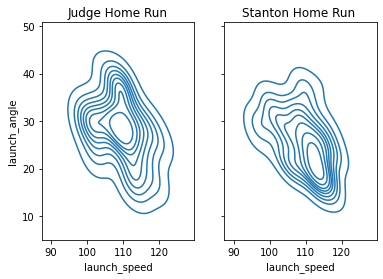

In [4]:
# Filter to include home runs only
judge_hr = judge[judge['events']=='home_run']
stanton_hr = stanton[stanton['events']=='home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
m,b= np.polyfit(judge_hr['launch_speed'],judge_hr['launch_angle'],1)
plt.scatter(judge_hr['launch_speed'],judge_hr['launch_angle'], s=12)
plt.plot(judge_hr['launch_speed'], m*judge_hr['launch_speed']+b, label='Judge')
plt.legend()

m,b= np.polyfit(stanton_hr['launch_speed'],stanton_hr['launch_angle'],1)
plt.scatter(stanton_hr['launch_speed'], stanton_hr['launch_angle'], s=12)
plt.title('Judge/Stanton\nHome Runs, 2015-2017')
plt.plot(stanton_hr['launch_speed'], m*stanton_hr['launch_speed']+b, label='Stanton')
plt.legend()
plt.ylabel('Launch Angle')
plt.xlabel('Launch Speed')
plt.show()

#make kedplot of data above
x1= judge_hr['launch_speed']
y1= judge_hr['launch_angle']
x2= stanton_hr['launch_speed']
y2= stanton_hr['launch_angle']
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(data=judge_hr, x=x1, y=y1, ax=axs1[0]).set_title('Judge Home Run')
sns.kdeplot(data=stanton_hr, x=x2, y=y2,  ax=axs1[1]).set_title('Stanton Home Run ')

## Findings: Launch Speed and Launch Angle Analysis
- Judge appears to hit the ball with both greater velocity and launch angle than Stanton.  
- The majority of Stanton's homeruns are grouped around a launch angle between 15-30 degrees while Judges home runs have a greater spread in terms of launch angle.
- Judge's home run launch speeds vary more than Stanton', showing he doesn't always hit the ball as hard (launch speed) but still gets the home run due to increased launch angle. 

# Pitch Speed on Home Runs Analysis
Statcast records the release speed of the baseball as it leaves the pitchers hand and moves towards the batter. Here we are looking at the speed distribution of the pitches that Judge and Stanton hit homeruns off.  It will be interesting to find out what pitch speed each player prefers. 

169


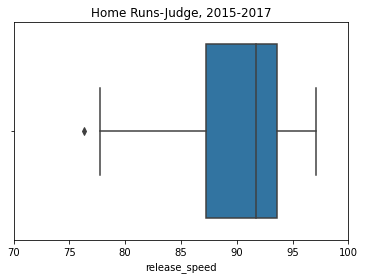

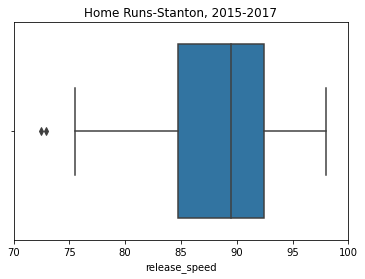

In [4]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])
print(len(judge_stanton_hr))
# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(data=judge_hr, x=judge_hr['release_speed']).set_title('Home Runs-Judge, 2015-2017')
plt.xlim(70,100)
plt.xticks([70,75,80,85,90,95,100])
plt.show()
sns.boxplot(data=stanton_hr, x=stanton_hr['release_speed']).set_title('Home Runs-Stanton, 2015-2017')
plt.xlim(70,100)
plt.xticks([70,75,80,85,90,95,100])
plt.show()

## Findings: Pitch Speed on Home Runs Analysis 
- Stanton seems to prefer slower pitches as the distribution of pitch speed on his home runs is noticeably lower than that of Aaron Judge.
- Stanton seems to be able to hit home runs off a greater variety of pitch speeds as the minimum and maximum pitch speeds from his home run data are respectivly smaller and larger than those of Judge. Also the inner quartile range of Stanton's home run pitch speeds is greater than that of Judge. 

## Strike Zone Analysis on Home Runs
Below we will be looking at statcast stike zone data for both Judge and Stanton's home runs.  Statcast uses a special numbered system to track the path of each pitch through the strikezone. This numbered system can be seen in the diagram below. 
<p><img style="margin:5px 20px 5px 1px; width:20%;" src="https://assets.datacamp.com/production/project_250/img/zone.png"></p>
For our analysis, we are curious what areas of the strike zone increase the likelyhood of Judge or Stanton hitting a home run.  In order to better analyze statcasts strike zone data, we must first map their numbered strike zone values to a more traditional x-y coordinate plane.  This is accomplished using the functions below, which convert the statcast strikezone values into more traditional x-y coordinate values with the origin at the lower laft of the strikezone.

In [5]:
# Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13, and 14 are ignored for plotting simplicity.

def assign_x_coord(row):
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
#  Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13, and 14 are ignored for plotting simplicity.
def assign_y_coord(row):
    # Upper third of strike zone
    if row.zone in [1,2,3]:
        return 3
    if row.zone in [4,5,6]:
        return 2
    if row.zone in [7,8,9]:
        return 1
    

Next, we use the newly mapped x-y coordinate values assigned to each pitch to create a 2-D histogram.  This histogram will map out the density of homerun pitches passing through each section of the strike zone. 

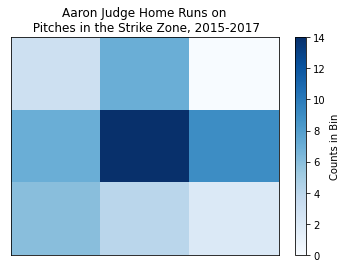

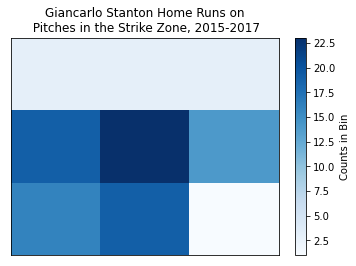

In [6]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign x-ycoordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'],judge_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.show()

# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]
# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y']= stanton_strike_hr.apply(assign_y_coord, axis=1)

# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.show()


## Findings: Strike Zone Analysis on Home Runs 
- Stanton hits most home runs from pitches to the center of the strikezone but he seems to prefer pitches in the bottom of the strike zone as these regions show a greater density of home run hits.
- Judge hits most home runs from pitches to the center of the strikezone also, but beyond that he has little obvious preference as his home runs were hit on pitches fairly evenly distributed across the strikezone. 
- Judge's least favorite pitch seems to be the high and away pitch while Stanton's is the low and away.